# ***PHASE 2 PROJECT***

![Long and Foster](Images/Long_and_Foster.png)

# 1. BUSINESS UNDERSTANDING

Real estate company Long and Foster has expanded their operations to King County, Washington, and is interested in developing a predictive model that can estimate the sale price of a house. Being new to the area, they are not familiar with the housing landscape and need to better understand their market. By analyzing various factors such as the number of bedrooms, bathrooms, square footage of the house, location, and other important features, L&F aim to provide more accurate home sale price estimates to their clients and improve their business efficiency.

The modeling process will also help Long and Foster identify potential investment opportunities in the county by analyzing which features have the most significant impact on the sale price of a house. By using the results of the analysis, the company can make better decisions regarding their investments in the county.

The objective of this project is to create a multiple linear regression model that can predict the sale price of a house based on predictive factors and provide insights that can help Long and Foster improve their business operations.

### Why multiple linear regression?

Instead of a basic, exploratory data analysis, we are using statistical analyses, such as regression coefficients and R-squared values. Such statistics allow us to identify and tactically measure the relationships between different variables in our data. Basic data analysis (i.e. creating graphs and charts) help us visualize our data and identify patterns, but it does not provide us with a formal measure of the strength of the relationships or the predictive power of the variables.

Regression analysis estimate the coefficients of each variable and their statistical significance, which helps us to understand the relative importance of each variable in predicting the target (price).

In addition, regression analysis allows us to control for the effects of other variables in the model and assess their impact on the dependent variable. This allows us to isolate the effect of each independent variable on the dependent variable and identify potential investment opportunities based on the variables that have the most significant impact on house prices.

### The Dataset

For this project, we are using 'kc_house_data.csv', a public, tabular dataset lifted from from King County, WA's website (kingcounty.gov).

Our target variable is 'price', which records final sale price of King County homes. Columns serve as features (predictors) in this dataset. The dataset has been updated to include homes sold up until the year 2022.

# 2. DATA UNDERSTANDING

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Reading dataset as a pandas DataFrame
df = pd.read_csv('data/kc_house_data.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Inspecting dataframe head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Getting descriptive statistics of the dataframe
df.describe

<bound method NDFrame.describe of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors water

In [4]:
df.shape

(30155, 25)

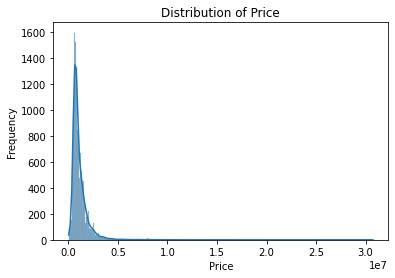

In [5]:
# Plot histogram with distribution curve for target variable 'price'
sns.histplot(data=df, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [6]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

### Summary of Data Understanding

- There are 30,155 observations and 25 features in the dataset.

- Numeric predictors are: 'id' (recordor observation number), 'date' (date sold), 'bedrooms' (no. bedrooms), 'bathrooms' (no. bathrooms), 'sqft_above'(square footage of home apart from basement), 'sqft_living'(square footage of living space in the home),'sqft_lot'(square footage of lot), 'sqft_garage'(square footage of garage), 'sqft_patio(square footage of outdoor patio),'floors'(number of floors, including levels, in the home), 'yr_built'(year home was built), 'yr_renovated'(if and when home was renovated), 'lat'(latitude coordinate), and 'long'(longitude coordinate).

- Categorical predictors are: 'waterfront'(whether or not home is on a waterfront, eg. Puget Sound, Lake Washington, etc.), 'greenbelt'(whether or not home is near or adjacent to a green belt or natural land),'nuisance'(whether or not the home is near an airport, heavy traffic, or other notable nuisances), 'view'(quality of both nature and city views from the home), 'condition'(overall codified condition of the house as defined by (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), 'grade'(overall grade of the house pertaining to construction and design), 'heat_source'(heat source type), and 'sewer_system'(sewer system type).

- There are 32 null values in feature 'heat_source' and 14 in 'sewer_system'.

- Target 'price' is fairly skewed.


# 3. DATA PREPARATION

### Handling missing values

In [7]:
# Dropping null values 
df = df.dropna(subset=['heat_source', 'sewer_system'])

### Feature engineering

First, let's make a 'house_age' feature that uses 'yr_built' to calculate how old a house is.

In [8]:
import datetime as dt

# Convert 'yr_built' to datetime format
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

# Calculate age feature
current_year = dt.datetime.now().year
df['house_age'] = current_year - df['yr_built'].dt.year

# Print first 5 rows of transformed data
df['house_age'].head()

<ipython-input-8-ef23c0205458>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')
<ipython-input-8-ef23c0205458>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['house_age'] = current_year - df['yr_built'].dt.year


0    54
1    73
2    67
3    13
4    11
Name: house_age, dtype: int64

In [9]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Create separate columns for 'month', 'year', and 'day'
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

# Create binary features for seasons using 'month' column
df['season_winter'] = df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
df['season_spring'] = df['month'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
df['season_summer'] = df['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
df['season_fall'] = df['month'].apply(lambda x: 1 if x in [9, 10, 11] else 0)

<ipython-input-9-087c5335e57d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-9-087c5335e57d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-9-087c5335e57d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

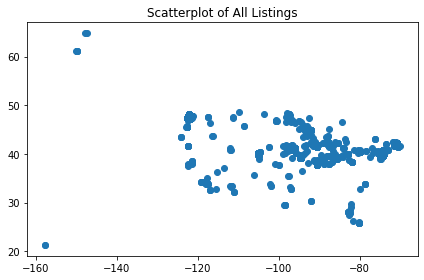

In [10]:
# Plotting all listings by longitude and latitude
fig, ax = plt.subplots()
ax.scatter(df['long'],df['lat'])

plt.title('Scatterplot of All Listings')
fig.tight_layout();

In [11]:
# Extracting state from address
df['state'] = df['address'].apply(lambda x: str(x).split(' ')[-4])
# extract zip code from address
df['zip'] = df['address'].apply(lambda x: str(x).split(' ')[-3].replace(',', ''))
# extract city from address
df['city'] = df['address'].apply(lambda x: str(x).split(',')[-3].strip())

<ipython-input-11-50654eafd615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['address'].apply(lambda x: str(x).split(' ')[-4])
<ipython-input-11-50654eafd615>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip'] = df['address'].apply(lambda x: str(x).split(' ')[-3].replace(',', ''))
<ipython-input-11-50654eafd615>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [12]:
# Printing summary of listings
print('Total listings: ' + str(len(df)))
print('Out of state listings: ' + str(len(df[df['state'] != 'Washington'])))

Total listings: 30111
Out of state listings: 907


In [13]:
# Creating a set out of state records to rop
out_of_state = set(df[df['state'] != 'Washington'].index)

# Dropping out of state records
df.drop(out_of_state, inplace=True)

<ipython-input-13-907968b8ea8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(out_of_state, inplace=True)


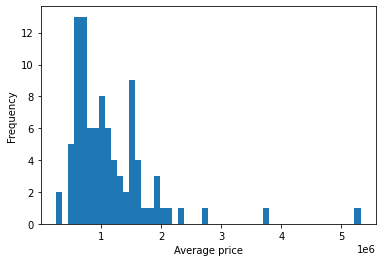

In [14]:
# Group the DataFrame by zip code and calculate the mean price
zip_avg_price = df.groupby('zip').agg({'price': 'mean'})

# Plot a histogram of the mean prices
plt.hist(zip_avg_price['price'], bins=50)
plt.xlabel('Average price')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Sort the zip codes by average price and get the top 10
top_10_zip_codes = zip_avg_price.sort_values(by='price', ascending=False).head(10)

# Print the top 10 zip codes and their corresponding cities
for i, zip_code in enumerate(top_10_zip_codes.index):
    city = df.loc[df['zip'] == zip_code, 'city'].iloc[0]
    print(f"{i+1}. {zip_code}, {city}: {top_10_zip_codes.loc[zip_code, 'price']:.2f}")


1. 98039, Medina: 5319169.51
2. 98004, Clyde Hill: 3706461.83
3. 98040, Mercer Island: 2761960.32
4. 98270, Marysville: 2375000.00
5. 98005, Bellevue: 2166382.24
6. 98033, Kirkland: 2035934.79
7. 98223, Arlington: 1973375.00
8. 98112, Seattle: 1933852.31
9. 98075, Sammamish: 1903188.73
10. 98006, Bellevue: 1871561.59


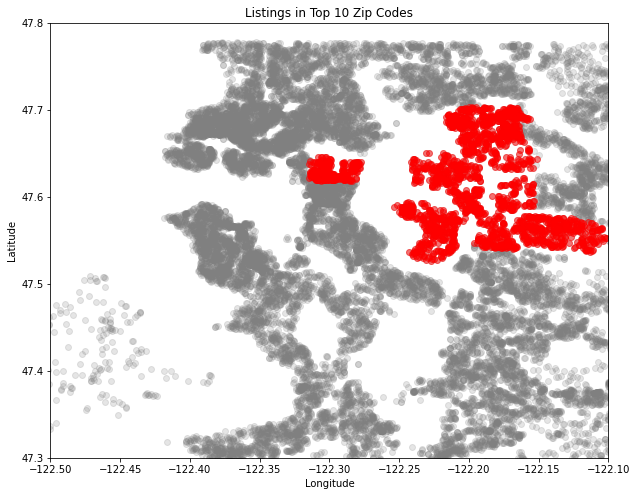

In [16]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the latitude and longitude of each listing in gray
ax.scatter(df['long'], df['lat'], alpha=0.2, color='gray')

# Filter the DataFrame to include only the top 10 zip codes
df_top_10_zips = df[df['zip'].isin(top_10_zip_codes.index)]

# Plot the latitude and longitude of each listing in the top 10 zip codes in red
ax.scatter(df_top_10_zips['long'], df_top_10_zips['lat'], alpha=0.5, color='red')

# Set the axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Listings in Top 10 Zip Codes')

# Zoom in on the scatter plot
ax.set_xlim([-122.5, -122.1])
ax.set_ylim([47.3, 47.8])

# Display the plot
plt.show()



In [17]:
# Create tiers of zip codes within the top 10 zip codes by price
top_10_zip_codes['price_tier'] = pd.qcut(top_10_zip_codes['price'], q=3, labels=['Low', 'Medium', 'High'])

# Merge the top 10 zip codes with the original DataFrame
df = df.merge(top_10_zip_codes[['price_tier']], how='left', left_on='zip', right_index=True)


In [18]:
df['price_tier'].value_counts()

Low       1248
Medium     787
High       730
Name: price_tier, dtype: int64

In [19]:
df.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
greenbelt            0
nuisance             0
view                 0
condition            0
grade                0
heat_source          0
sewer_system         0
sqft_above           0
sqft_basement        0
sqft_garage          0
sqft_patio           0
yr_built             0
yr_renovated         0
address              0
lat                  0
long                 0
house_age            0
month                0
year                 0
day                  0
season_winter        0
season_spring        0
season_summer        0
season_fall          0
state                0
zip                  0
city                 0
price_tier       26439
dtype: int64

In [20]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Drop rows with missing price_tier values
df_copy.dropna(subset=['price_tier'], inplace=True)


In [21]:
df_copy.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
house_age        0
month            0
year             0
day              0
season_winter    0
season_spring    0
season_summer    0
season_fall      0
state            0
zip              0
city             0
price_tier       0
dtype: int64

In [22]:
df_copy['price_tier']

16          Low
27         High
36         High
42         High
50       Medium
          ...  
30097       Low
30126    Medium
30130      High
30135    Medium
30139    Medium
Name: price_tier, Length: 2765, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

### Encoding and consolidating categorical features

In [23]:
# One-hot encoding categorical data
df_copy = pd.get_dummies(df_copy, columns=['waterfront', 'sewer_system', 'heat_source', 'price_tier', 'nuisance', 'greenbelt', 'condition', 'grade'], drop_first=True)
df_copy.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'house_age', 'month', 'year', 'day', 'season_winter',
       'season_spring', 'season_summer', 'season_fall', 'state', 'zip', 'city',
       'waterfront_YES', 'sewer_system_PUBLIC',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'price_tier_Medium',
       'price_tier_High', 'nuisance_YES', 'greenbelt_YES', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [24]:
# create new feature 'low_grade'
df_copy['low_grade'] = df_copy[['grade_4 Low', 'grade_5 Fair']].any(axis=1).astype(int)

# create new feature 'average_grade'
df_copy['average_grade'] = df_copy[['grade_6 Low Average', 'grade_7 Average', 'grade_8 Good']].any(axis=1).astype(int)

# create new feature 'good_grade'
df_copy['good_grade'] = df_copy[['grade_9 Better', 'grade_11 Excellent']].any(axis=1).astype(int)

# create new feature 'luxury_grade'
df_copy['luxury_grade'] = df_copy[['grade_12 Luxury', 'grade_13 Mansion']].any(axis=1).astype(int)


In [25]:
# Create a new feature by dividing 'bedrooms' by 'sqft_living'
df_copy = df_copy.assign(bedrooms_per_sqft_living = df_copy['bedrooms'] / df_copy['sqft_living'])


In [26]:
# Dropping the original encoded 'grade' features
df_copy = df_copy.drop(['grade_4 Low',
         'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
         'grade_8 Good', 'grade_9 Better', 'grade_11 Excellent',
         'grade_12 Luxury', 'grade_13 Mansion'], axis=1)

# Dropping 'id', 'date', 'address' and 'view' features
df_copy = df_copy.drop(['id', 'date', 'address', 'view', 'year', 'month', 'day'], axis=1)

### Exploring correlation and multicollinearity

In [27]:
# creating a correlation matrix of all features with respect to 'price' 
corr_with_price = df_copy.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price                            1.000000
sqft_living                      0.631152
sqft_above                       0.563782
bathrooms                        0.531059
waterfront_YES                   0.467271
luxury_grade                     0.422625
price_tier_High                  0.382303
sqft_patio                       0.377607
sqft_garage                      0.291827
bedrooms                         0.289895
sqft_basement                    0.254444
sqft_lot                         0.220958
floors                           0.185477
good_grade                       0.159595
yr_renovated                     0.100543
heat_source_Gas                  0.099743
sewer_system_PUBLIC              0.085954
season_spring                    0.074350
heat_source_Gas/Solar            0.017049
season_winter                    0.002385
lat                              0.001209
heat_source_Electricity/Solar   -0.012758
condition_Poor                  -0.015867
nuisance_YES                    -0

<ipython-input-27-27953d94a278>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price = df_copy.corr()['price'].sort_values(ascending=False)


We see that 'sqft_living' as the highest correlation to 'price', and we will likely use it as our feature in our baseline model. Let's visualize 'sqft_living''s distribution, and then we'll visualize the correlated pairs in the dataset.

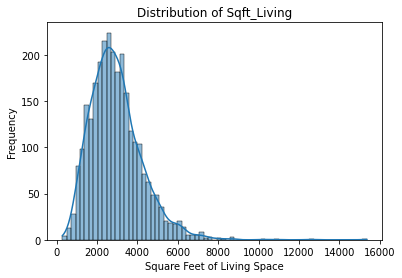

In [28]:
# Plot histogram with distribution curve for variable 'sqft_living'
sns.histplot(data=df_copy, x='sqft_living', kde=True)
plt.xlabel('Square Feet of Living Space')
plt.ylabel('Frequency')
plt.title('Distribution of Sqft_Living')
plt.show()

Much like the raw 'price' data, we see that the distribution of highest-correlated feature 'sqft_living' is skewed. We will address this in future model iterations.

<ipython-input-29-fb5e443c1e84>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)


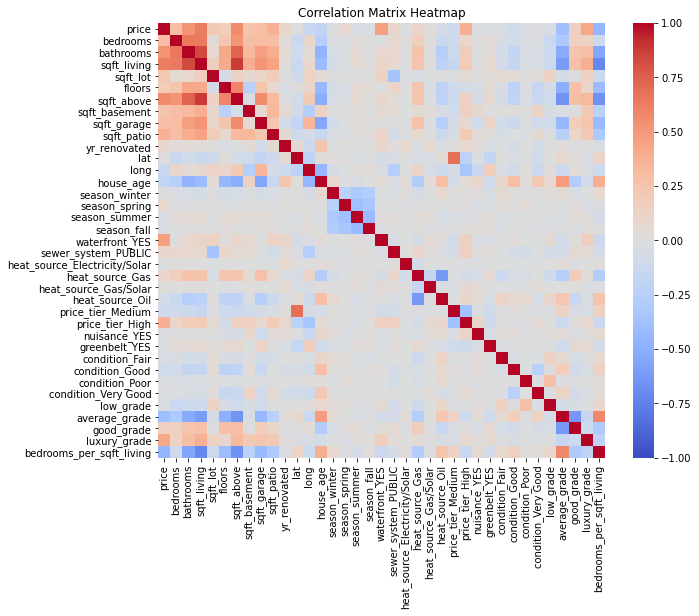

In [29]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)

# add title and rotate y-axis label for better readability
plt.title('Correlation Matrix Heatmap')
plt.yticks(rotation=0)
plt.show()


In [30]:
# Save absolute value of correlation matrix as a data frame
# Converts all values to absolute value
# Stacks the row:column pairs into a multindex
# Reset the index to set the multindex to separate columns
# Sort values. 0 is the column automatically generated by the stacking
df_mc = (
    df_copy.corr()
    .abs()
    .stack()
    .reset_index()
    .sort_values(0, ascending=False)
)

# Zip the variable name columns (which were only named level_0 and level_1 by default) in a new column named "pairs"
df_mc['pairs'] = list(zip(df_mc['level_0'], df_mc['level_1']))

# Set index to pairs
df_mc.set_index(['pairs'], inplace=True)

# Drop level columns
df_mc.drop(columns=['level_1', 'level_0'], inplace=True)

# Rename correlation column as "cc" rather than 0
df_mc.columns = ['cc']

# Filter for correlations between 0.62 and 1
df_mc_filtered = df_mc[(df_mc.cc > 0.62) & (df_mc.cc < 1)]


<ipython-input-30-8c610252ca9b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


In [31]:
df_mc_filtered

,cc
pairs,
"(sqft_above, sqft_living)",0.875568
"(sqft_living, sqft_above)",0.875568
"(sqft_living, bathrooms)",0.831689
"(bathrooms, sqft_living)",0.831689
"(bathrooms, sqft_above)",0.736531
"(sqft_above, bathrooms)",0.736531
"(sqft_living, bedrooms_per_sqft_living)",0.719899
"(bedrooms_per_sqft_living, sqft_living)",0.719899
"(price_tier_Medium, lat)",0.684517


# 4. MODELING

### Basline model

In [32]:
# Defining x and y variables
y = df_copy['price']
X_baseline = df_copy['sqft_living']

# Creating the baseline model
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
baseline_model

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [33]:
# Fitting the model
baseline_results = baseline_model.fit()
baseline_results

In [34]:
print('Model f-statistic:', baseline_results.fvalue)
print('Model p-value:', baseline_results.f_pvalue)
print('R-squared:', baseline_results.rsquared)
print( 'Regression coefficients:', baseline_results.params)

Model f-statistic: 1829.3933926593713
Model p-value: 3.4796708481783517e-307
R-squared: 0.3983529363106245
Regression coefficients: const         -20883.093587
sqft_living      800.061612
dtype: float64


### Baseline model results interpretation

The model results show the following:

* ***The F-statistic for the overall model is 1829.39***, which indicates that the model is statistically significant.

* ***The p-value for the overall model is very low (3.48e-307),*** which further supports the conclusion that the model is statistically significant.

* ***The R-squared value is 0.398,*** which means that approximately 40% of the variance in the dependent variable (price) can be explained by the independent variable (sqft_living).

* ***The regression coefficient for the sqft_living is 800.06,*** which means that for each one unit increase in sqft_living, the predicted value of the dependent variable (price) increases by $ 800.06, holding all other factors constant.

Overall, these results suggest that sqft_living is a significant predictor of price and that there is a positive linear relationship between the two variables. However, the model's R-squared value suggests that there is still a significant amount of unexplained variance in price, and additional factors may be needed to improve the model's accuracy.







### Baseline model visualization

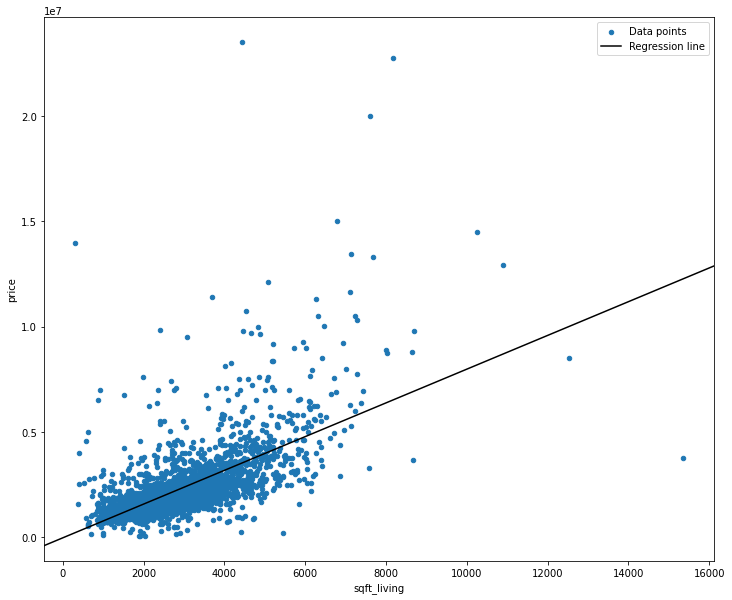

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
df_copy.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend()
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


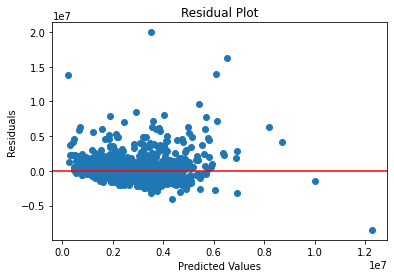

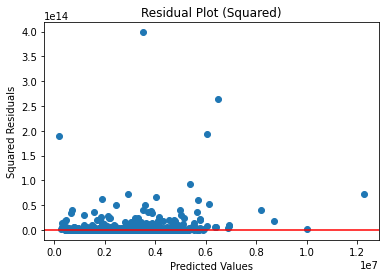

In [36]:
# Generate predictions using the baseline model
y_pred = baseline_results.predict(sm.add_constant(X_baseline))

# Residual plot to check for linearity and homoscedasticity
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Plotting the residuals against the fitted values to check for homoscedasticity
plt.scatter(y_pred, residuals ** 2)
plt.title('Residual Plot (Squared)')
plt.xlabel('Predicted Values')
plt.ylabel('Squared Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


We see from the residual plots abpve that our baseline model violates assumptions of linearity (first plot) and homoscedasicity (first plot). This means we might have to transform some variables.  

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


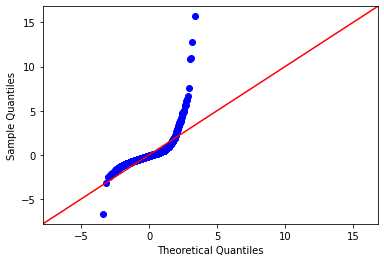

In [37]:
from scipy import stats

# Creating qq plot to visualize residuals
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

The qq plot above shows that a large portion of the true data points in 'sqft_living' stray far from normal distribution. This means that the model is underestimating the price for many of the higher values of 'sqft_living'. This is even further evidence that we might not include this feature in future model iterations, barring any sort of transformation on the variable. Since we plan on log transforming the target feature 'price', we might abstain from log transfoming 'sqft_living' and focus on 'price_log' instead:

### Log transformation

In [38]:
# Log transforming target 'price'
df_copy['price_log'] = np.log(df_copy['price'])


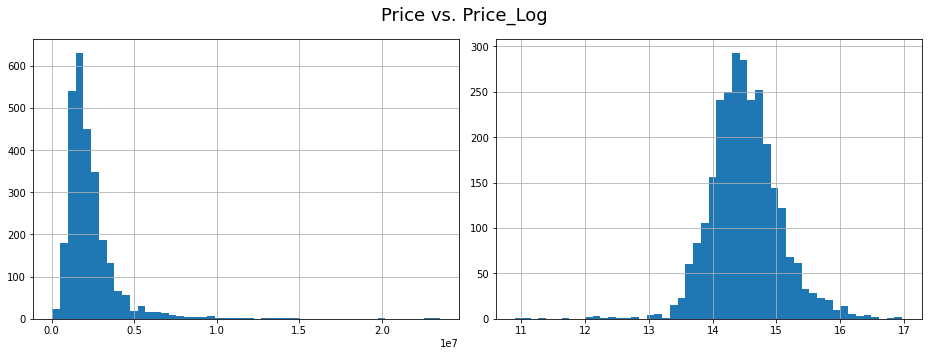

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,5))

df_copy['price'].hist(ax = ax1, bins=50)
df_copy['price_log'].hist(ax = ax2, bins=50)

fig.suptitle('Price vs. Price_Log', size=18)
fig.tight_layout();

We can see above that log-transforming the target variable can create a more normal distribution. This will allow us to work better with the data, as linear regression operates on the assumption that distributions are normal.

In [40]:
# creating a correlation matrix of all features with respect to 'price' 
corr_with_price_log = df_copy.corr()['price_log'].sort_values(ascending=False)
print(corr_with_price_log)

price_log                        1.000000
price                            0.862851
sqft_living                      0.665085
sqft_above                       0.603581
bathrooms                        0.565188
price_tier_High                  0.386584
bedrooms                         0.363152
sqft_patio                       0.359144
sqft_garage                      0.344246
waterfront_YES                   0.325134
luxury_grade                     0.301294
sqft_basement                    0.246125
floors                           0.242699
good_grade                       0.236171
sqft_lot                         0.202745
heat_source_Gas                  0.147171
season_spring                    0.122353
sewer_system_PUBLIC              0.107226
yr_renovated                     0.107149
heat_source_Gas/Solar            0.024841
season_winter                    0.005164
heat_source_Electricity/Solar   -0.009750
greenbelt_YES                   -0.011193
lat                             -0

<ipython-input-40-031c5e5ff56b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price_log = df_copy.corr()['price_log'].sort_values(ascending=False)


In [41]:
df_copy.dtypes

price                                   float64
bedrooms                                  int64
bathrooms                               float64
sqft_living                               int64
sqft_lot                                  int64
floors                                  float64
sqft_above                                int64
sqft_basement                             int64
sqft_garage                               int64
sqft_patio                                int64
yr_built                         datetime64[ns]
yr_renovated                              int64
lat                                     float64
long                                    float64
house_age                                 int64
season_winter                             int64
season_spring                             int64
season_summer                             int64
season_fall                               int64
state                                    object
zip                                     

In [42]:
# Dropping yr_built column for next model
df_copy = df_copy.drop(['yr_built', 'state', 'state', 'city'], axis=1)

# Converting all integers to floats
df_copy = df_copy.astype('float64')

### Multiple linear regression- all features model

In [43]:
# Define target variable (y) and exogenous variables (X)
y = df_copy['price_log']
X_all_features = df_copy.drop(['price_log', 'price'], axis=1)

# Add constant to X
X_all_features = sm.add_constant(X_all_features)

# Create OLS model
second_model = sm.OLS(y, X_all_features)

# Fit model and print summary
second_results = second_model.fit()
print(second_results.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        10:55:36   Log-Likelihood:                -838.76
No. Observations:                2765   AIC:                             1752.
Df Residuals:                    2728   BIC:                             1971.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Our R-squared value has jumped up significantly to 0.64, explaining about 64% of variability in 'price_log'. Features that stand out:

- waterfront_YES: The coefficient is 0.6725, meaning that having a waterfront view is associated with a higher price.

- price_tier_High: The coefficient is 0.2843, indicating that properties in the highest price tier have a higher price compared to the properties in the lowest price tier.

- bedrooms_per_sqft_living: The coefficient is -119.9465, indicating that an increase in the ratio of bedrooms to square footage of living space is associated with a decrease in price. This seems a little suspicious, but could have something to do with location. Properties further outside urban centers might have more bedrooms, but sell for less. It's worth keeping that in mind going forward.

Either way, it looks like location plays a big factor in explaining variability in price_log. Having a waterfront property and/or a property in the highest price tier indicates strong predictability. 

The model indicates some multicollinearity among features, likely because of the inclusion of highly correlated feature 'sqft_living'. Since we are starting to see our focus shift towards location over size, let's eliminate 'sqft_living', along with a host of other features, using Recursive Feature Elimination (RFE), and go from there:

### Recursive feature selection

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define target variable (y) and exogenous variables (X), excluding 'lat', 'long', and 'condition' grades.
y = df_copy['price_log']
X = df_copy[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
             'sqft_garage', 'sqft_patio', 'yr_renovated', 'house_age', 'season_winter',
             'season_spring', 'season_summer', 'season_fall', 'waterfront_YES', 'sewer_system_PUBLIC',
             'heat_source_Electricity/Solar', 'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
             'price_tier_Medium', 'price_tier_High', 'nuisance_YES', 'greenbelt_YES', 'low_grade', 'average_grade',
             'good_grade', 'luxury_grade', 'bedrooms_per_sqft_living']]

# Create a linear regression object
linreg = LinearRegression()

# Create the RFE object and set the number of features to select
rfe = RFE(estimator=linreg, n_features_to_select=10, step=1)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the selected features and their ranking
print("Selected features:")
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        print(X.columns[i], rfe.ranking_[i])


Selected features:
bedrooms 1
season_summer 1
season_fall 1
waterfront_YES 1
heat_source_Electricity/Solar 1
price_tier_Medium 1
price_tier_High 1
average_grade 1
luxury_grade 1
bedrooms_per_sqft_living 1


### Third model: Iterated all-features model

We will now use a all but one feature (bedrooms_per_sqft_living) selected using RFE in our third and final model and see where our results take us. We will exclude 'sqft_living' as it has previously been idenfitied as a strongly correlated with many other features to be used in modeling:

In [45]:
# Define target variable (y) and exogenous variables (X)
y = df_copy['price_log']
X_third = df_copy[['bedrooms', 'season_summer', 'season_fall', 'waterfront_YES', 'heat_source_Electricity/Solar', 'price_tier_Medium', 'price_tier_High', 'average_grade', 'luxury_grade']]

# Add constant to X
X_third = sm.add_constant(X_third)

# Create OLS model
third_model = sm.OLS(y, X_third)

# Fit model and print summary
third_results = third_model.fit()
print(third_results.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     322.9
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        10:55:36   Log-Likelihood:                -1253.8
No. Observations:                2765   AIC:                             2528.
Df Residuals:                    2755   BIC:                             2587.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


# 4. CONCLUSIONS AND RECOMMENDATIONS

### Final model interpretation


**The R-squared value of 0.513** indicates that approximately 51% of the variation in the dependent variable can be explained by the independent variables in the model, which is a bit of a decrease from our all-features model R-squared value of 0.640. This isn't bad, but the model could better explain variability in price_log.

The model's diagnostics show that the residuals are not normally distributed, as indicated by the significant Jarque-Bera test result (p-value of 0.00). Additionally, the Durbin-Watson statistic of 1.923 suggests the presence of positive autocorrelation in the residuals, indicating that the model may not be capturing all of the relevant variables.

Using two **standout coefficients** above, we can calculate the percentage increase in price_log associated with waterfront_YES and price_tier_High as follows:

***For waterfront_YES:***

The coefficient for waterfront_YES is 0.7502.
This means that, holding all other variables constant, a property with a waterfront view is associated with a 75.02% increase in price_log compared to a property without a waterfront view.
This translates to a (exp(0.7502) - 1) * 100 = 110.87% increase in price.

***For price_tier_High:***

The coefficient for price_tier_High is 0.3990.
This means that, holding all other variables constant, a property in the highest price tier is associated with a 39.90% increase in price_log compared to a property in the lowest price tier (the reference category).
This translates to a (exp(0.3990) - 1) * 100 = 48.96% increase in price.

Let's do some plotting to visualize listings by features price_tier_High and waterfront_YES:

In [46]:
# Create a new dataframe with the zip and price_tier_High columns
df_high = df_copy[['zip', 'price_tier_High']].copy()

# Filter the dataframe to only include rows where price_tier_High is True
df_high = df_high[df_high['price_tier_High'] == True]

# Print out the zipcodes associated with price_tier_High
print(df_high['zip'].unique())


[98039. 98004. 98040.]


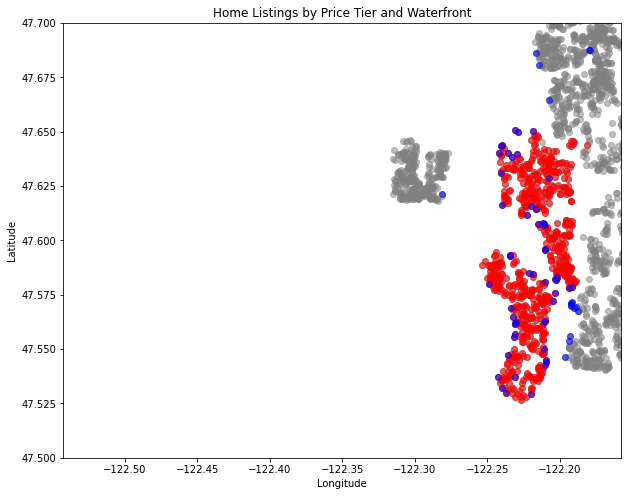

In [47]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,8))

# Create a scatterplot for all listings
ax.scatter(df_copy['long'], df_copy['lat'], color='gray', alpha=0.5)

# Create a scatterplot for high price listings (price_tier_High)
ax.scatter(df_copy.loc[df_copy['price_tier_High']==True, 'long'], df_copy.loc[df_copy['price_tier_High']==True, 'lat'], color='red', alpha=0.5)

# Create a scatterplot for waterfront listings (waterfront_YES)
ax.scatter(df_copy.loc[df_copy['waterfront_YES']==True, 'long'], df_copy.loc[df_copy['waterfront_YES']==True, 'lat'], color='blue', alpha=0.5)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Home Listings by Price Tier and Waterfront')

# Set the limits of the x and y axes
ax.set_xlim([-122.4, -122.3])
ax.set_ylim([47.5, 47.7])

# Set the aspect ratio and spacing
ax.set_aspect(aspect=1.5, adjustable='box', anchor='C')
ax.set_adjustable('datalim')

# Show the plot
plt.show()


As we can see from the plot above, the majority of price_tier_High listing zone contains the majority of waterfront listings. 

For Long and Foster to maximize profits as they break into the King County housing market, we recommend concentrating in the price_tier_High zone (zip codes 98039, 98004 & 98040), placing a special focus on waterfront properties, as those properties have the potential to yield highest sale prices.